In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.6.0


In [3]:
df = pd.read_pickle('bpm_big_data_shift4.plk') 
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,250,50,0.0,0.0,Upstream,300,0.327720,0.371527,0.292497,0.362120,...,171.509558,181.900762,158.908857,140.592316,151.740905,146.828236,226.647387,245.910795,154.785258,166.431234
1,250,50,0.0,0.0,Upstream,300,0.311771,0.356898,0.274921,0.342156,...,169.830697,216.475140,149.517695,142.558361,194.306958,157.963311,194.643836,192.405427,160.568958,138.940992
2,250,50,0.0,0.0,Upstream,300,0.336448,0.388673,0.301275,0.368691,...,220.313357,161.436996,166.954946,115.122176,174.017122,168.100156,247.267401,188.196305,173.494629,159.973436
3,250,50,0.0,0.0,Upstream,300,0.312761,0.369008,0.304187,0.367516,...,188.036476,197.883136,167.412521,123.291434,196.146067,138.611335,197.914373,200.568075,188.845954,157.322576
4,250,50,0.0,0.0,Upstream,300,0.312109,0.375567,0.310179,0.377982,...,187.096749,187.556606,154.283859,106.170747,154.124673,144.756091,228.785693,211.103056,190.272829,153.553488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,250,1,0.0,-1.0,Downstream,300,0.164531,0.213478,0.194903,0.181066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11996,250,1,0.0,-1.0,Downstream,300,0.150945,0.206443,0.184874,0.175678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11997,250,1,0.0,-1.0,Downstream,300,0.144606,0.196726,0.178423,0.168635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11998,250,1,0.0,-1.0,Downstream,300,0.144625,0.196734,0.177356,0.169459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df = df[df.num_bunches == 50]
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,250,50,0.0,0.0,Upstream,300,0.327720,0.371527,0.292497,0.362120,...,171.509558,181.900762,158.908857,140.592316,151.740905,146.828236,226.647387,245.910795,154.785258,166.431234
1,250,50,0.0,0.0,Upstream,300,0.311771,0.356898,0.274921,0.342156,...,169.830697,216.475140,149.517695,142.558361,194.306958,157.963311,194.643836,192.405427,160.568958,138.940992
2,250,50,0.0,0.0,Upstream,300,0.336448,0.388673,0.301275,0.368691,...,220.313357,161.436996,166.954946,115.122176,174.017122,168.100156,247.267401,188.196305,173.494629,159.973436
3,250,50,0.0,0.0,Upstream,300,0.312761,0.369008,0.304187,0.367516,...,188.036476,197.883136,167.412521,123.291434,196.146067,138.611335,197.914373,200.568075,188.845954,157.322576
4,250,50,0.0,0.0,Upstream,300,0.312109,0.375567,0.310179,0.377982,...,187.096749,187.556606,154.283859,106.170747,154.124673,144.756091,228.785693,211.103056,190.272829,153.553488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,250,50,0.0,-1.0,Downstream,300,0.617900,0.660846,0.705875,0.617443,...,301.105345,251.357160,235.750900,173.625289,229.632554,212.887962,377.809643,311.169641,263.254518,205.428077
11696,250,50,0.0,-1.0,Downstream,300,0.588883,0.636128,0.675733,0.594999,...,299.840478,246.211853,300.771132,180.878054,253.742395,214.170810,327.807085,323.375737,270.017283,209.624602
11697,250,50,0.0,-1.0,Downstream,300,0.589507,0.627817,0.656347,0.575578,...,247.010089,269.212241,236.421331,185.599561,282.823781,208.814008,385.642118,291.792856,194.608387,237.838267
11698,250,50,0.0,-1.0,Downstream,300,0.605714,0.657009,0.697370,0.616061,...,281.187851,281.108794,279.252720,203.397150,257.426705,268.270230,317.900674,313.449697,285.910387,205.627416


In [5]:
# Define variable to predict
output = 'B441PV_std'

df = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', output]]
df

,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
0,0.327720,0.371527,0.292497,0.362120,0.301619,0.125850,0.101718,0.237316,155.495896
1,0.311771,0.356898,0.274921,0.342156,0.284810,0.119603,0.093042,0.227425,150.237326
2,0.336448,0.388673,0.301275,0.368691,0.308642,0.127942,0.101388,0.242175,162.092019
3,0.312761,0.369008,0.304187,0.367516,0.295262,0.126901,0.097820,0.233455,150.551321
4,0.312109,0.375567,0.310179,0.377982,0.298148,0.129247,0.098420,0.237784,139.410850
...,...,...,...,...,...,...,...,...,...
11695,0.617900,0.660846,0.705875,0.617443,0.640925,0.235454,0.163863,0.561070,421.549529
11696,0.588883,0.636128,0.675733,0.594999,0.615192,0.227115,0.157787,0.543192,393.252944
11697,0.589507,0.627817,0.656347,0.575578,0.597116,0.217992,0.153769,0.520809,419.866253
11698,0.605714,0.657009,0.697370,0.616061,0.629490,0.235262,0.165373,0.565146,461.232342


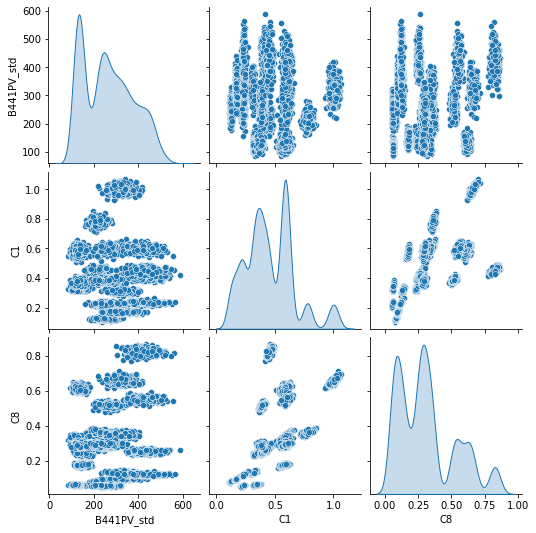

In [6]:
sns.pairplot(df[[output, 'C1', 'C8']], diag_kind='kde') # Just plot some relationships

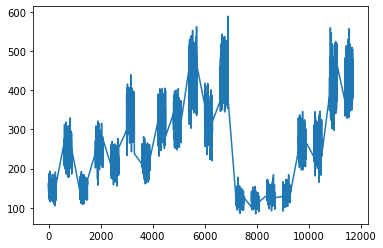

In [7]:
plt.plot(df[output])

In [8]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 8520 to 9675
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   C1          4800 non-null   float64
 1   C2          4800 non-null   float64
 2   C3          4800 non-null   float64
 3   C4          4800 non-null   float64
 4   C5          4800 non-null   float64
 5   C6          4800 non-null   float64
 6   C7          4800 non-null   float64
 7   C8          4800 non-null   float64
 8   B441PV_std  4800 non-null   float64
dtypes: float64(9)
memory usage: 375.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 11697
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   C1          1200 non-null   float64
 1   C2          1200 non-null   float64
 2   C3          1200 non-null   float64
 3   C4          1200 non-null   float64
 4   C5          1200 non-null   float64
 5  

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
C1,4800.0,0.454060,0.208889,0.105150,0.318872,0.422832,0.588089,1.058378
C2,4800.0,0.452646,0.204857,0.122433,0.267143,0.485649,0.575079,0.963082
C3,4800.0,0.486587,0.301209,0.087674,0.265995,0.453184,0.679142,1.402010
C4,4800.0,0.527328,0.315294,0.114204,0.268099,0.480824,0.684288,1.511656
C5,4800.0,0.456088,0.236673,0.098114,0.275587,0.462410,0.574654,1.167380
C6,4800.0,0.171538,0.112996,0.032029,0.091603,0.137640,0.225579,0.535569
C7,4800.0,0.122065,0.074507,0.018935,0.071563,0.092919,0.169468,0.318602
C8,4800.0,0.312786,0.212498,0.050842,0.126140,0.283571,0.382809,0.865310
B441PV_std,4800.0,263.590374,110.758743,84.190893,151.199573,254.784138,345.940643,588.879279


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(output)
test_labels = test_features.pop(output)

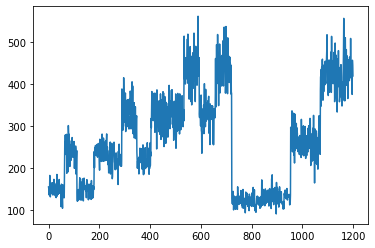

In [11]:
plt.plot(np.array(test_labels))

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [B441PV_var]')
  plt.ylim([0, 50])
  plt.legend()
  plt.grid(True)

In [28]:
# Linear Regression with multiple inputs 
# Normalization layer
normalizer_array = np.array(train_features)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

first = np.array(normalizer_array[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print('Normalized:', normalizer(first).numpy())

[[0.45406    0.4526461  0.4865867  0.52732784 0.456088   0.1715377
  0.12206455 0.31278577]]
[[0.04362571 0.04195757 0.09070792 0.09938934 0.05600246 0.01276543
  0.00555011 0.04514609]]
First example: [[0.37 0.25 0.77 0.77 0.3  0.22 0.17 0.29]]
Normalized: [[-0.4  -1.    0.95  0.78 -0.68  0.41  0.66 -0.13]]


In [29]:
# Build keras sequential model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [30]:
# Configure the training of the model
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error',
    metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [31]:
%%time
# Execute the training
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=50)
history = linear_model.fit(
    normalizer_array, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    callbacks=[early_stop])

CPU times: user 15 s, sys: 1.63 s, total: 16.7 s
Wall time: 10.9 s


In [32]:
# Get the training process numbers
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
0,234.183121,70029.992188,85.181732,204.383301,55884.929688,71.581772,0
1,174.687042,44755.019531,58.020679,145.822418,32591.851562,46.512131,1
2,125.419769,26641.816406,39.033855,102.836739,19599.320312,32.403492,2
3,95.507759,17892.373047,30.364164,83.343529,13336.587891,27.808281,3
4,81.973885,12690.297852,27.685799,73.605400,9635.718750,26.339725,4
...,...,...,...,...,...,...,...
128,40.623543,2976.306396,15.787598,40.462418,2865.893799,16.216524,128
129,40.577309,2956.755371,15.837064,40.564014,2871.366699,16.344530,129
130,40.693584,2974.794434,15.824003,40.936485,2881.813965,16.651058,130
131,40.616051,2951.010742,15.880567,40.417767,2867.244629,16.168726,131


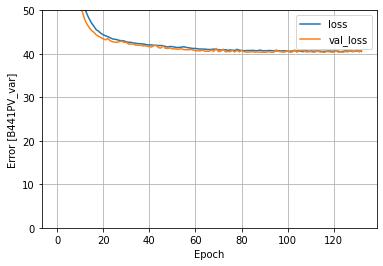

In [33]:
plot_loss(history)

In [35]:
# Evaluate using the test dataset
test_results = {}

test_results['c1_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)
test_results

{'c1_model': [42.0241584777832, 3121.062255859375, 16.51451301574707]}

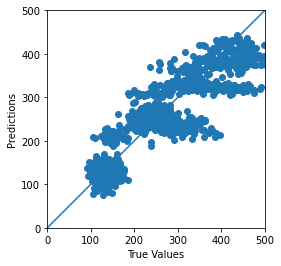

In [36]:
test_predictions_linear_model = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_linear_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

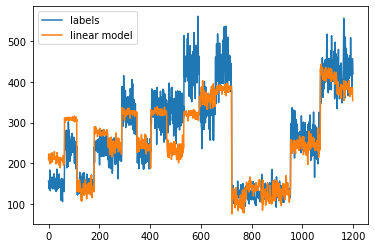

In [37]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.legend()

In [38]:
# Now let's use a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['mean_squared_error', 'mean_absolute_percentage_error'])
  return model

In [39]:
normalizer_array = np.array(train_features)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())

[[0.45406    0.4526461  0.4865867  0.52732784 0.456088   0.1715377
  0.12206455 0.31278577]]


In [40]:
# Now lets do the full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_2 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [41]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=500)
history = dnn_model.fit(
    normalizer_array, train_labels,
    validation_split=0.2,
    verbose=0, epochs=10000,
    callbacks=[early_stop])

CPU times: user 5min 42s, sys: 1min 13s, total: 6min 56s
Wall time: 2min 39s


In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
703,23.946037,1125.124146,9.460379,22.723545,917.852478,8.684417,703
704,21.649914,832.066040,8.357426,22.791040,922.730652,8.713286,704
705,21.649721,830.905273,8.376371,22.711071,918.953247,8.664712,705
706,21.642994,830.304443,8.353315,22.711552,920.482361,8.680454,706
707,21.786312,837.302307,8.466917,22.728888,923.427429,8.731478,707


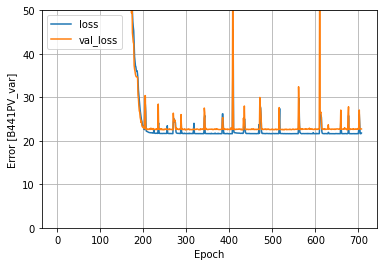

In [43]:
plot_loss(history)

In [44]:
# Evaluate using the test dataset
test_results['dnn_model'] = dnn_model.evaluate(test_features, 
                                               test_labels, verbose=0)
test_results

{'c1_model': [42.0241584777832, 3121.062255859375, 16.51451301574707],
 'dnn_model': [21.629913330078125, 855.805908203125, 8.398634910583496]}

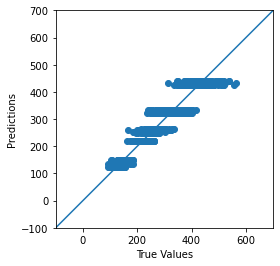

In [45]:
test_predictions_dnn_model = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_dnn_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-100, 700]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

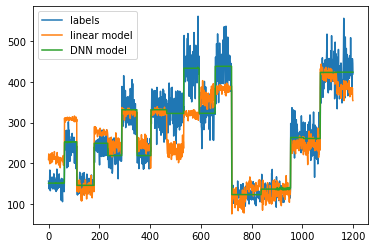

In [46]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.plot(np.array(test_predictions_dnn_model), label='DNN model')
plt.legend()

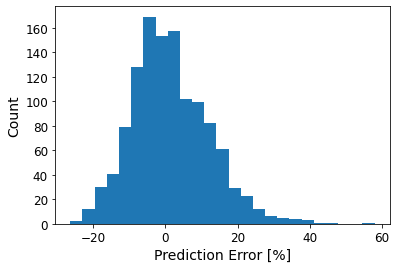

In [58]:
error = (test_predictions_dnn_model - test_labels) * (100/test_labels)

fig = plt.figure()
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [%]', fontsize=14)
_ = plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('hist_resultsD.eps', format='eps')

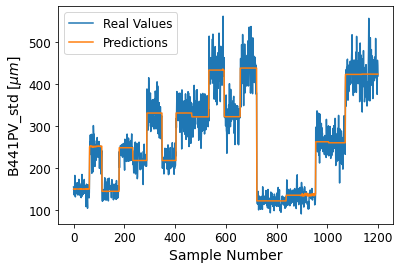

In [54]:
fig = plt.figure()
plt.plot(np.array(test_labels), label='Real Values')
plt.plot(np.array(test_predictions_dnn_model), label='Predictions')
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('B441PV_std ' + r'$[\mu m]$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('NN_resultsD.png', format='png')
#plt.xlim(0,200)

(1100.0, 1200.0)

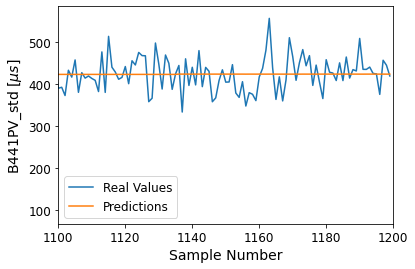

In [55]:
fig = plt.figure()
plt.plot(np.array(test_labels), label='Real Values')
plt.plot(np.array(test_predictions_dnn_model), label='Predictions')
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('B441PV_std ' + r'$[\mu s]$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1100,1200)

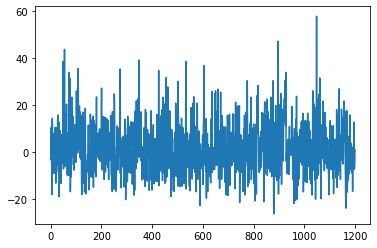

In [56]:
plt.plot(np.array(error))

In [57]:
# Let's compare the test results of the models
pd.DataFrame(test_results, index=['Mean absolute error', 'mean_squared_error', 'mean_absolute_percentage_error']).T

,Mean absolute error,mean_squared_error,mean_absolute_percentage_error
c1_model,42.024158,3121.062256,16.514513
dnn_model,21.629913,855.805908,8.398635


Done!